# Ejercicio_1: Ofertas_relampago

In [463]:
# llamado de las librerias que son base para el desarrollo de EDA

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb


In [465]:
# Cargar CSV

df_rp = pd.read_csv('ofertas_relampago.csv')
df_rp.head(n=10)

,OFFER_START_DATE,OFFER_START_DTTM,OFFER_FINISH_DTTM,OFFER_TYPE,INVOLVED_STOCK,REMAINING_STOCK_AFTER_END,SOLD_AMOUNT,SOLD_QUANTITY,ORIGIN,SHIPPING_PAYMENT_TYPE,DOM_DOMAIN_AGG1,VERTICAL,DOMAIN_ID
0,2021-06-22,2021-06-22 16:00:00+00:00,2021-06-22 23:02:43+00:00,lightning_deal,4,-2,4.72,6.0,A,none,PETS FOOD,CPG,MLM-BIRD_FOODS
1,2021-06-22,2021-06-22 13:00:00+00:00,2021-06-22 19:00:02+00:00,lightning_deal,5,5,NaN,NaN,NaN,free_shipping,PET PRODUCTS,OTHERS,MLM-ANIMAL_AND_PET_PRODUCTS
2,2021-06-22,2021-06-22 07:00:00+00:00,2021-06-22 13:00:01+00:00,lightning_deal,15,12,10.73,3.0,NaN,none,COMPUTERS,CE,MLM-SPEAKERS
3,2021-06-22,2021-06-22 19:00:00+00:00,2021-06-23 01:36:12+00:00,lightning_deal,15,13,7.03,2.0,NaN,none,COMPUTERS,CE,MLM-HEADPHONES
4,2021-06-22,2021-06-22 13:00:00+00:00,2021-06-22 15:48:12+00:00,lightning_deal,15,0,39.65,15.0,NaN,none,COMPUTERS,CE,MLM-HEADPHONES
5,2021-06-22,2021-06-22 18:00:00+00:00,2021-06-23 01:00:12+00:00,lightning_deal,23,23,NaN,NaN,A,free_shipping,COMPUTERS,CE,MLM-HEADPHONES
6,2021-06-22,2021-06-22 13:00:00+00:00,2021-06-22 19:00:00+00:00,lightning_deal,10,10,NaN,NaN,NaN,free_shipping,COMPUTERS,CE,MLM-HEADPHONES
7,2021-06-22,2021-06-22 19:00:00+00:00,2021-06-22 23:05:39+00:00,lightning_deal,10,-1,103.03,11.0,NaN,free_shipping,COMPUTERS,CE,MLM-HEADPHONES
8,2021-06-22,2021-06-22 19:00:00+00:00,2021-06-22 23:05:32+00:00,lightning_deal,10,-1,NaN,NaN,NaN,free_shipping,COMPUTERS,CE,MLM-HEADPHONES
9,2021-06-22,2021-06-22 13:00:00+00:00,2021-06-22 19:00:00+00:00,lightning_deal,15,13,10.65,2.0,NaN,free_shipping,ELECTRONICS,CE,MLM-SMART_SPEAKERS


In [544]:
# Cambiar de formato a las columnas de fecha y calcular ticket promedio de venta y tiempo de publicación de la oferta relampago

from datetime import datetime

df_rp['OFFER_START_DATE'] = pd.to_datetime(df_rp['OFFER_START_DATE'])
df_rp['MONTHNUM'] = df_rp['OFFER_START_DATE'].dt.strftime('%Y%m')
df_rp['OFFER_START_DTTM'] = pd.to_datetime(df_rp['OFFER_START_DTTM'])
df_rp['OFFER_FINISH_DTTM'] = pd.to_datetime(df_rp['OFFER_FINISH_DTTM'])
df_rp['TICKET']= df_rp['SOLD_AMOUNT'] / df_rp['SOLD_QUANTITY'] 
df_rp['PUBLIC_TIME']= df_rp['OFFER_FINISH_DTTM'] - df_rp['OFFER_START_DTTM']
df_rp['RANGO_INVOLVED_STOCK']=df_rp['INVOLVED_STOCK'].apply(lambda x: '1-100' if x <= 100 else ('100-500' if x > 100 and x < 500 else '>500'))
df_rp['RANGO_TICKET']=df_rp['TICKET'].apply(lambda x: 'Bajo' if x <= 100 else ('Medio' if x > 100 and x < 300 else 'Alto'))





In [546]:
# Hacer un mapeo de los campos de la base de datos, con el fin de revisar volumen y que a tipo de dato es ... string, int, float 
df_rp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48746 entries, 0 to 48745
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype              
---  ------                     --------------  -----              
 0   OFFER_START_DATE           48746 non-null  datetime64[ns]     
 1   OFFER_START_DTTM           48746 non-null  datetime64[ns, UTC]
 2   OFFER_FINISH_DTTM          48746 non-null  datetime64[ns, UTC]
 3   OFFER_TYPE                 48746 non-null  object             
 4   INVOLVED_STOCK             48746 non-null  int64              
 5   REMAINING_STOCK_AFTER_END  48746 non-null  int64              
 6   SOLD_AMOUNT                24579 non-null  float64            
 7   SOLD_QUANTITY              24579 non-null  float64            
 8   ORIGIN                     11316 non-null  object             
 9   SHIPPING_PAYMENT_TYPE      48746 non-null  object             
 10  DOM_DOMAIN_AGG1            48746 non-null  object             
 11  VE

In [548]:
# Verifico como se ve el DF con los cambios

df_rp.head(n=10)

,OFFER_START_DATE,OFFER_START_DTTM,OFFER_FINISH_DTTM,OFFER_TYPE,INVOLVED_STOCK,REMAINING_STOCK_AFTER_END,SOLD_AMOUNT,SOLD_QUANTITY,ORIGIN,SHIPPING_PAYMENT_TYPE,DOM_DOMAIN_AGG1,VERTICAL,DOMAIN_ID,MONTHNUM,TICKET,PUBLIC_TIME,RANGO_TICKET,RANGO_INVOLVED_STOCK
0,2021-06-22,2021-06-22 16:00:00+00:00,2021-06-22 23:02:43+00:00,lightning_deal,4,-2,4.72,6.0,A,none,PETS FOOD,CPG,MLM-BIRD_FOODS,202106,0.786667,0 days 07:02:43,Bajo,1-100
1,2021-06-22,2021-06-22 13:00:00+00:00,2021-06-22 19:00:02+00:00,lightning_deal,5,5,NaN,NaN,NaN,free_shipping,PET PRODUCTS,OTHERS,MLM-ANIMAL_AND_PET_PRODUCTS,202106,NaN,0 days 06:00:02,Alto,1-100
2,2021-06-22,2021-06-22 07:00:00+00:00,2021-06-22 13:00:01+00:00,lightning_deal,15,12,10.73,3.0,NaN,none,COMPUTERS,CE,MLM-SPEAKERS,202106,3.576667,0 days 06:00:01,Bajo,1-100
3,2021-06-22,2021-06-22 19:00:00+00:00,2021-06-23 01:36:12+00:00,lightning_deal,15,13,7.03,2.0,NaN,none,COMPUTERS,CE,MLM-HEADPHONES,202106,3.515000,0 days 06:36:12,Bajo,1-100
4,2021-06-22,2021-06-22 13:00:00+00:00,2021-06-22 15:48:12+00:00,lightning_deal,15,0,39.65,15.0,NaN,none,COMPUTERS,CE,MLM-HEADPHONES,202106,2.643333,0 days 02:48:12,Bajo,1-100
5,2021-06-22,2021-06-22 18:00:00+00:00,2021-06-23 01:00:12+00:00,lightning_deal,23,23,NaN,NaN,A,free_shipping,COMPUTERS,CE,MLM-HEADPHONES,202106,NaN,0 days 07:00:12,Alto,1-100
6,2021-06-22,2021-06-22 13:00:00+00:00,2021-06-22 19:00:00+00:00,lightning_deal,10,10,NaN,NaN,NaN,free_shipping,COMPUTERS,CE,MLM-HEADPHONES,202106,NaN,0 days 06:00:00,Alto,1-100
7,2021-06-22,2021-06-22 19:00:00+00:00,2021-06-22 23:05:39+00:00,lightning_deal,10,-1,103.03,11.0,NaN,free_shipping,COMPUTERS,CE,MLM-HEADPHONES,202106,9.366364,0 days 04:05:39,Bajo,1-100
8,2021-06-22,2021-06-22 19:00:00+00:00,2021-06-22 23:05:32+00:00,lightning_deal,10,-1,NaN,NaN,NaN,free_shipping,COMPUTERS,CE,MLM-HEADPHONES,202106,NaN,0 days 04:05:32,Alto,1-100
9,2021-06-22,2021-06-22 13:00:00+00:00,2021-06-22 19:00:00+00:00,lightning_deal,15,13,10.65,2.0,NaN,free_shipping,ELECTRONICS,CE,MLM-SMART_SPEAKERS,202106,5.325000,0 days 06:00:00,Bajo,1-100


In [550]:
# Calcular los estadisticos de las variables numericas para hacer un overwiew del DF

df_rp.describe()

,OFFER_START_DATE,INVOLVED_STOCK,REMAINING_STOCK_AFTER_END,SOLD_AMOUNT,SOLD_QUANTITY,TICKET,PUBLIC_TIME
count,48746,48746.000000,48746.000000,24579.000000,24579.000000,24579.000000,48746
mean,2021-07-05 11:24:49.008328704,35.007508,30.565216,51.208898,10.851052,8.840607,0 days 05:42:30.039900709
min,2021-06-01 00:00:00,1.000000,-192.000000,0.280000,1.000000,0.121333,0 days 00:00:00
25%,2021-06-22 00:00:00,5.000000,4.000000,5.730000,1.000000,2.365000,0 days 06:00:00
50%,2021-07-07 00:00:00,10.000000,8.000000,12.420000,3.000000,3.994000,0 days 06:00:02
75%,2021-07-21 00:00:00,15.000000,15.000000,30.925000,6.000000,7.670000,0 days 06:00:16
max,2021-07-31 00:00:00,9000.000000,8635.000000,4836.570000,1646.000000,639.070000,4 days 08:45:09
std,NaN,206.761058,195.813806,175.254414,45.475305,22.367321,0 days 02:06:47.146022376


In [475]:
# Hacer una vista para ver como se ve la variacion mes a mes por vertical y monto

Pivot_table = df_rp.pivot_table(values='SOLD_AMOUNT',
                                index=['VERTICAL'],
                                columns='MONTHNUM',
                                aggfunc='sum',
                               margins=True)
print(Pivot_table)


MONTHNUM            202106     202107         All
VERTICAL                                         
ACC                9401.20   17418.78    26819.98
APP & SPORTS      51129.47   79971.89   131101.36
BEAUTY & HEALTH  183958.92  363468.35   547427.27
CE               117843.08  244944.86   362787.94
CPG                7777.16    9010.52    16787.68
ENTERTAINMENT      1016.04     972.53     1988.57
HOME & INDUSTRY   57365.40   98153.28   155518.68
OTHERS             1504.28     424.96     1929.24
T & B              5418.99    8883.79    14302.78
All              435414.54  823248.96  1258663.50


In [650]:
# Crecimiento mes a mes en monto

a = 435414.54
b = 823248.96
crec = (b/a)-1

print(crec)

0.890724549529283


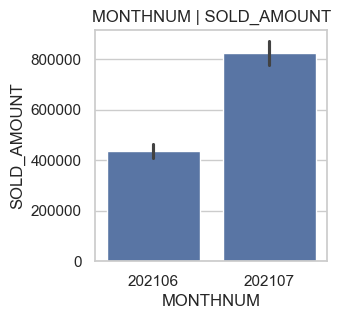

In [477]:
# Gráfico de barras (MONTHNUM | SOLD_AMOUNT)

plt.figure(figsize=(3, 3))
sb.barplot(x='MONTHNUM', y='SOLD_AMOUNT', data=df_rp, estimator='sum')
plt.title('MONTHNUM | SOLD_AMOUNT')
plt.xlabel('MONTHNUM')
plt.ylabel('SOLD_AMOUNT')
plt.show()

In [479]:
# Hacer una vista para ver como se ve la variacion mes a mes por vertical y cantidad 

Pivot_table_1 = df_rp.pivot_table(values='SOLD_QUANTITY',
                                index=['VERTICAL'],
                                columns='MONTHNUM',
                                aggfunc='sum',
                               margins=True)
print(Pivot_table_1)

MONTHNUM          202106    202107       All
VERTICAL                                    
ACC               1686.0    3470.0    5156.0
APP & SPORTS      9887.0   15771.0   25658.0
BEAUTY & HEALTH  56596.0  121545.0  178141.0
CE                6433.0   15400.0   21833.0
CPG               2787.0    2909.0    5696.0
ENTERTAINMENT      176.0     181.0     357.0
HOME & INDUSTRY   8769.0   18392.0   27161.0
OTHERS             273.0      84.0     357.0
T & B             1119.0    1230.0    2349.0
All              87726.0  178982.0  266708.0


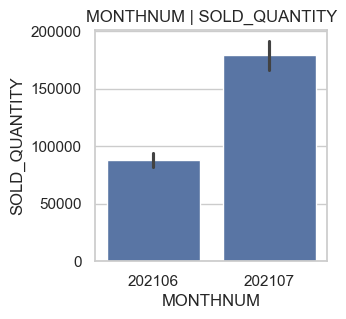

In [481]:
# Gráfico de barras (MONTHNUM | SOLD_QUANTITY)

plt.figure(figsize=(3, 3))
sb.barplot(x='MONTHNUM', y='SOLD_QUANTITY', data=df_rp, estimator='sum')
plt.title('MONTHNUM | SOLD_QUANTITY')
plt.xlabel('MONTHNUM')
plt.ylabel('SOLD_QUANTITY')
plt.show()

In [652]:
# Crecimiento mes a mes en monto

a = 87726
b = 178982
crec = (b/a)-1

print(crec)

1.0402389257460731


In [483]:
# Hacer una vista para ver como se ve la variacion mes a mes por vertical y Ticket 

Pivot_table_2 = df_rp.pivot_table(values='TICKET',
                                index=['VERTICAL'],
                                columns='MONTHNUM',
                                aggfunc='mean',
                               margins=True)
print(Pivot_table_2)

MONTHNUM            202106     202107        All
VERTICAL                                        
ACC               7.774339   6.091880   6.652271
APP & SPORTS      6.217965   6.027683   6.097740
BEAUTY & HEALTH   5.834505   6.180536   6.044484
CE               23.972067  17.422939  19.492226
CPG               4.214925   4.045933   4.120839
ENTERTAINMENT     6.288768   5.349161   5.834801
HOME & INDUSTRY   8.630171   6.555392   7.267814
OTHERS            8.068814   5.357152   7.157331
T & B             6.906042  10.482014   9.012248
All               9.484977   8.472901   8.840607


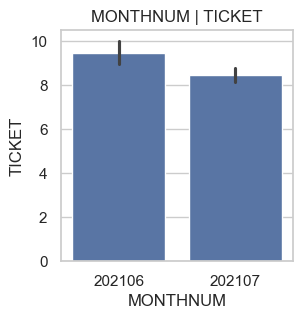

In [485]:
# Gráfico de barras (MONTHNUM | TICKET)
plt.figure(figsize=(3, 3))
sb.barplot(x='MONTHNUM', y='TICKET', data=df_rp, estimator='mean')
plt.title('MONTHNUM | TICKET')
plt.xlabel('MONTHNUM')
plt.ylabel('TICKET')
plt.show()

In [506]:
# Cantidad de publicaciones de ofertas relampago por mes

df_group = df_rp.groupby('MONTHNUM')['OFFER_START_DATE'].count()

print(df_group)



MONTHNUM
202106    18336
202107    30410
Name: OFFER_START_DATE, dtype: int64


In [654]:
# Crecimiento mes a mes en ofertas

a = 18336
b = 30410
crec = (b/a)-1

print(crec)

0.6584860383944153


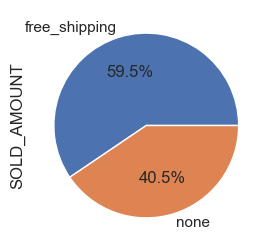

In [502]:
# Participación por SHIPPING_PAYMENT_TYPE

df_group = df_rp.groupby('SHIPPING_PAYMENT_TYPE')['SOLD_AMOUNT'].sum()

#print(df_group)

df_group.plot.pie(autopct='%1.1f%%', figsize=(3, 3))

plt.show()


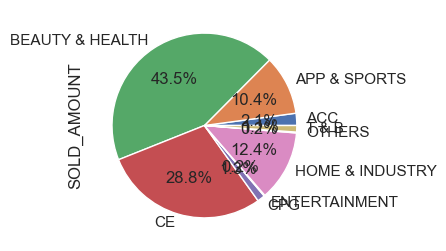

In [504]:
# Participación por VERTICAL

df_group = df_rp.groupby('VERTICAL')['SOLD_AMOUNT'].sum()

#print(df_group)

df_group.plot.pie(autopct='%1.1f%%', figsize=(3, 3))

plt.show()

In [514]:
# -> Top Deals en los dos meses por monto

df_group = df_rp.groupby('DOMAIN_ID')['SOLD_AMOUNT'].sum()
df_orden = df_group.sort_values(ascending=False)
print(df_orden.head(10))

DOMAIN_ID
MLM-SURGICAL_AND_INDUSTRIAL_MASKS    410363.30
MLM-CELLPHONES                       111678.79
MLM-TELEVISIONS                       66366.08
MLM-DISPOSABLE_GLOVES                 55365.39
MLM-HEADPHONES                        29628.06
MLM-SMARTWATCHES                      21572.06
MLM-TABLETS                           19123.19
MLM-OXIMETERS                         17606.61
MLM-NOTEBOOKS                         17598.28
MLM-SNEAKERS                          12004.28
Name: SOLD_AMOUNT, dtype: float64


In [516]:
# -> Top Deals en los dos meses por cantidad

df_group = df_rp.groupby('DOMAIN_ID')['SOLD_QUANTITY'].sum()
df_orden = df_group.sort_values(ascending=False)
print(df_orden.head(10))

DOMAIN_ID
MLM-SURGICAL_AND_INDUSTRIAL_MASKS    141369.0
MLM-DISPOSABLE_GLOVES                 13477.0
MLM-OXIMETERS                          8632.0
MLM-HEADPHONES                         4447.0
MLM-THERMOMETERS                       3777.0
MLM-LED_STRIPS                         1983.0
MLM-CELLPHONES                         1769.0
MLM-CHRISTMAS_LIGHTS                   1686.0
MLM-THERMOSES                          1590.0
MLM-LIGHT_BULBS                        1577.0
Name: SOLD_QUANTITY, dtype: float64


In [558]:
# Concentración de venta por rango de ticket ,
# Se definieron rangos segun el ticket de la oferta Bajo: <= 100, medio: >100 y <=300 y alto >300

df_group = df_rp.groupby('RANGO_TICKET')['SOLD_AMOUNT'].sum()

#df_orden = df_group.sort_values(ascending=False)
#print(df_orden)

Total_sold_amount = df_group.sum()

per_data = (df_group/Total_sold_amount)*100
per_data = per_data.round(2)
per_data = per_data.astype(str) + '%'

print(per_data)


RANGO_TICKET
Alto      0.97%
Bajo     90.81%
Medio     8.22%
Name: SOLD_AMOUNT, dtype: object


In [580]:
# Concentración de venta por profunidad de Stock,
# Se definieron rangos segun la cantidad de Stock (lambda x: '1-100' if x <= 100 else ('100-500' if x > 100 and x < 500 else '>500'))

df_group = df_rp.groupby('RANGO_INVOLVED_STOCK')['SOLD_AMOUNT'].sum()
#df_orden = df_group.sort_values(ascending=False)
#print(df_orden)

Total_sold_amount = df_group.sum()

per_data = (df_group/Total_sold_amount)*100
per_data = per_data.round(2)
per_data = per_data.astype(str) + '%'

print(per_data)


RANGO_INVOLVED_STOCK
1-100      57.41%
100-500    22.18%
>500        20.4%
Name: SOLD_AMOUNT, dtype: object


In [594]:
# Cantidad (%) de ofertas con Stockout una vez finalizada la publicación

Total_ofertas = df_rp['OFFER_START_DATE'].count()

#print(Total_public)

Total_stockout = df_rp[df_rp['REMAINING_STOCK_AFTER_END'] < 0]

Count_stockout = Total_stockout.shape[0]

#print(Counter)

per_data = (Count_stockout/Total_ofertas)*100
per_data = per_data.round(2)
per_data = per_data.astype(str) + '%'

print(per_data)


2.61%


In [606]:
# Ver Matriz de correlación de las variables numericas del DT

df_num = df_rp.select_dtypes(include=['number'])

#matriz_corr = df_num.corr()


In [608]:
df_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48746 entries, 0 to 48745
Data columns (total 6 columns):
 #   Column                     Non-Null Count  Dtype          
---  ------                     --------------  -----          
 0   INVOLVED_STOCK             48746 non-null  int64          
 1   REMAINING_STOCK_AFTER_END  48746 non-null  int64          
 2   SOLD_AMOUNT                24579 non-null  float64        
 3   SOLD_QUANTITY              24579 non-null  float64        
 4   TICKET                     24579 non-null  float64        
 5   PUBLIC_TIME                48746 non-null  timedelta64[ns]
dtypes: float64(3), int64(2), timedelta64[ns](1)
memory usage: 2.2 MB


In [614]:
# Ver Matriz de correlación de las variables numericas del DT

matriz_corr = df_num.corr()
matriz_corr


,INVOLVED_STOCK,REMAINING_STOCK_AFTER_END,SOLD_AMOUNT,SOLD_QUANTITY,TICKET,PUBLIC_TIME
INVOLVED_STOCK,1.000000,0.994240,0.405859,0.557684,-0.007042,0.098543
REMAINING_STOCK_AFTER_END,0.994240,1.000000,0.354320,0.484031,-0.002679,0.099981
SOLD_AMOUNT,0.405859,0.354320,1.000000,0.708884,0.304958,0.120777
SOLD_QUANTITY,0.557684,0.484031,0.708884,1.000000,-0.043968,0.061757
TICKET,-0.007042,-0.002679,0.304958,-0.043968,1.000000,0.155127
PUBLIC_TIME,0.098543,0.099981,0.120777,0.061757,0.155127,1.000000


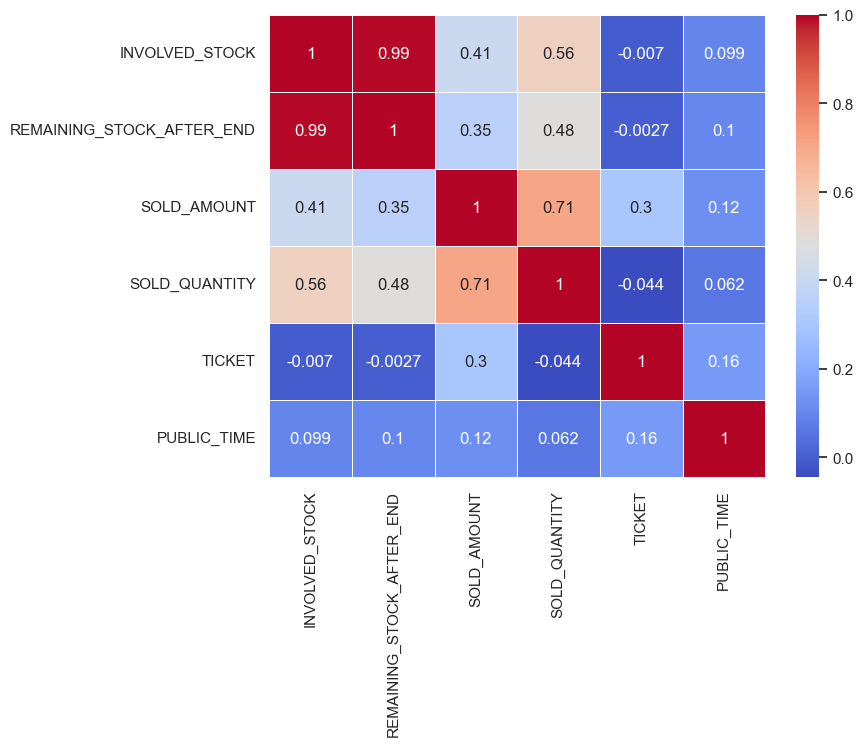

In [656]:
# Pintar Matriz de correlación de las variables numericas del DT

plt.figure(figsize=(8, 6))
sb.heatmap(matriz_corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.show()

# EDA

Reconocimiento del dataframe:

•	Se trata de una base de datos que registra en cada línea una promoción y características propias de esta, como fecha de la promo, cantidad vendida en unidades y en monto, disponibilidad de Stock, categorías y subcategorías del producto ofertado. 
•	El dataframe está compuesto por 13 campos, con un total 48,746 registros 
•	El dataframe original, consta de 3 variables del tipo DateTime, 4 variables de tipo numérico y 6 del tipo categórico
•	Se modificaron algunos formchas para mejor manipulación de la data
•	Se adicionaron 5 columnas con el fin de facilitar el análisis exploratorio de la base.
MONTHNUM-> Formato %Y%m
TICKET -> Precio de la oferta (SOLD_AMOUNT/ SOLD_QUANTITY)
PUBLIC_TIME -> Tiempo de la publicación
RANGO_INVOLVED_STOCK-> Clasificación por disponibilidad de Stock
RANGO_TCIKET -> Clasificación p
Análisis

 Análisis:
•	El número de ofertas relámpago aumento en 66% MoM
•	Hay un crecimiento significativo del 89% de junio a julio de 2021 en las ventas (SOLD_AMOUNT)
•	El crecimiento también tiene lugar en la cantidad de ítems vendidos (SOLD_QUANTITY), pero en mayor proporción, ya quee aumentaron  104% MoM
•	 En línea con las dos observaciones anteriores concluimos que el ticket medio, bajo de un mes a otro, es decir paso de 9.4 MXN a 8.4 MXN 
•	El 60% de las ofertas relámpago, se hicieron con Free_Shispping, lo que indica que podría ser un factor que influya en la intensión de compra de este tipo de ofertas (relámpago)
•	Beauty y Health es la categoría con mayor participación en venta durante los dos meses, al hacer un doble click a nivel de producto (DOMAIN_ID) podemos ver que la sub-categoría con mayor venta es MLM-SURGICAL_AND_INDUSTRIAL_MASKS en monto y en cantidades
•	Los periodos analizados corresponden a meses pos-pandemia de covid_19, esto explicaría la alta demanda de productos de las categorías: MLM-SURGICAL_AND_INDUSTRIAL_MASKS, MLM-DISPOSABLE_GLOVES, MLM-OXIMETERS, MLM-THERMOMETERS, y que permite identificar una buena practica comercial, ya que se aprovechó el espacio de las ofertas relámpago para ofertar productos que el mercado demandaba en ese momento.
•	El promedio de unidadvendidas es de las 11 unidades por oferta, lo que nos indica que mínimo debería haber un stock de 10 unidades por oferta, claro, teniendo en cuenta el tipo de producto, pero 51% del total de las ofertas tienen un INVOLVED_STOCK menor o igual a 10 unidades
•	El 7% del total de las ofertas tuvieron agotados, seria interesante hacer un análisis más profundo sobre este ,segmento de ofertas para identificar oportunidades de conversión, por que el 51% de las ofertas relámpago en el periodo de tiempo analizado no registraron venta  
•	El 90.81% de las ofertas relámpago tiene un ticket menor a los 100 MXN, lo que también representa un factor a tener en cuenta en la promos de este tipo
•	El 2.61% de las ofertas tuvieron Stock_out, lo que puede influir de manera negativa en el nivel de servicio 

